In [1]:
import pandas as pd
import os

In [2]:
files = os.listdir("../data/")
files

['salaries.csv',
 'dept_emp.csv',
 'dept_manager.csv',
 'departments.csv',
 'titles.csv',
 'employees.csv']

In [3]:
# import SQLAlchemy and inspect dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import psycopg2

from sqlalchemy import create_engine, inspect

import seaborn as sns
from config import PASSWORD_postgres

USERNAME = "postgres"
PASSWORD = PASSWORD_postgres
URL = "localhost"
PORT = 5432
DATABASE = "department23_db"

connection_str = f"postgresql+psycopg2://{USERNAME}:{PASSWORD}@{URL}:{PORT}/{DATABASE}"
#print(connection_str)

engine = create_engine(connection_str)

In [4]:
# create the inspector and connect to the engine

inspector_gadget = inspect(engine)

tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"])
    print()

titles
title_id
title

employees
emp_no
emp_title_id
birth_date
first_name
last_name
sex
hire_date

dept_manager
dept_no
emp_no

departments
dept_no
dept_name

dept_emp
emp_no
dept_no

salaries
emp_no
salary



In [43]:
#Query for question #1
query = """
        SELECT 
            Salaries.salary
        FROM Employees
        INNER JOIN Salaries ON Employees.emp_no=Salaries.emp_no;
    """
df = pd.read_sql(query, engine)
df.head(10)

,salary
0,48973
1,40000
2,40000
3,54816
4,40000
5,40000
6,87084
7,40000
8,48795
9,63016


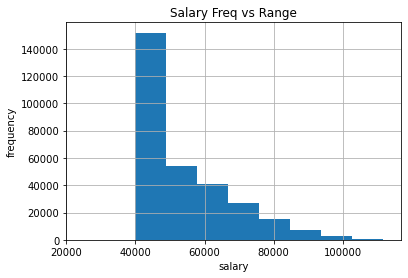

In [41]:
df.hist()
plt.ylabel("frequency")
plt.xlabel("salary")
plt.title ("Salary Freq vs Range")
plt.xlim(20000,117000)
plt.show()

In [45]:
df.salary.describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

In [48]:
df.salary.count()

300024

In [54]:
query = """
        SELECT 
            Titles.title,
            Avg(Salaries.salary)
        FROM Employees
        INNER JOIN Salaries ON Employees.emp_no=Salaries.emp_no
        INNER JOIN Titles ON Titles.title_id = Employees.emp_title_id
        GROUP BY Titles.title_id
        
    """
df = pd.read_sql(query, engine)
df

,title,avg
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Senior Engineer,48506.799871
3,Technique Leader,48582.896092
4,Manager,51531.041667
5,Staff,58465.382850
6,Senior Staff,58550.172704


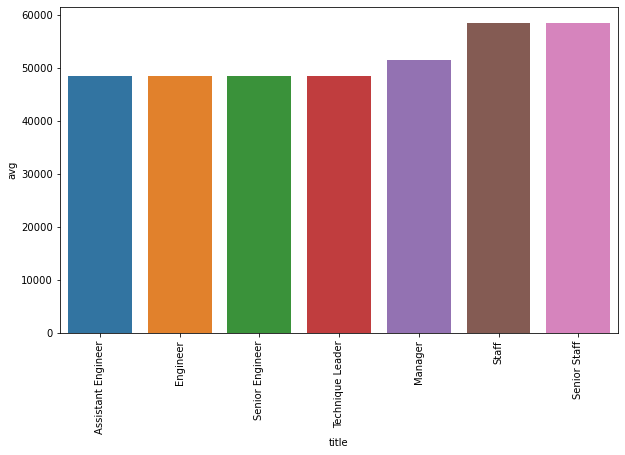

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = "title", y="avg")
plt.xticks(rotation=90)
plt.show()

In [56]:
query = """
        SELECT 
            Employees.emp_no, 
            Employees.last_name, 
            Employees.first_name, 
            Employees.sex, 
            Salaries.salary
            FROM Employees
            INNER JOIN Salaries ON Employees.emp_no=Salaries.emp_no;
        """
df = pd.read_sql(query, engine)
df

,emp_no,last_name,first_name,sex,salary
0,57444,Babb,Berry,F,48973
1,263976,Cusworth,Eran,M,40000
2,461591,Samarati,Xudong,M,40000
3,477657,Magliocco,Lihong,M,54816
4,29920,Tyugu,Shuichi,F,40000
...,...,...,...,...,...
300019,81057,Pocchiola,Patricio,M,40000
300020,464231,Eastman,Constantino,M,69696
300021,76671,Plessier,Ortrud,M,61886
300022,264920,Samarati,Percy,F,62772


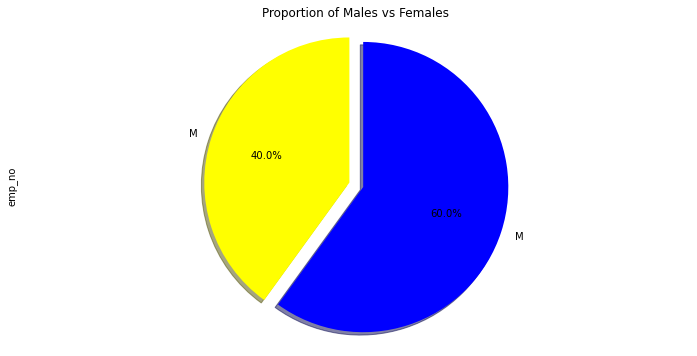

In [58]:
fig = plt.figure(figsize=(12,6))
df.groupby('sex')['emp_no'].size().plot(kind='pie', startangle=90, shadow=True, labels=['M','M'], explode=(0.1,0), autopct="%.1f%%", colors=["yellow","blue"], title='Proportion of Males vs Females')
fig = plt.figure
fig = plt.axis("equal")